# IMPORT LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset

In [0]:
data = pd.read_csv('Iris.csv')

In [0]:
X = data.iloc[:,1:5]

# NORMALIZE THE DATASET FOR PCA

In [0]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
X=Sc_x.fit_transform(X)

# USE PCA TO REDUCE THE DIMENSIONS

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
X = pca.fit_transform(X)

In [0]:
explained = pca.explained_variance_ratio_

In [40]:
explained

array([0.72770452, 0.23030523])

# Use ELBOW METHOD

Text(0, 0.5, 'wcss')

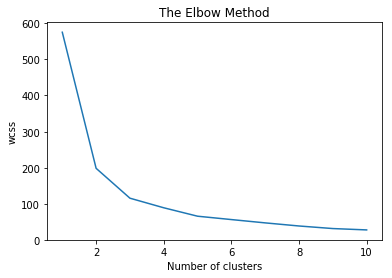

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11) :
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

# Once number of Clusters Decide fit to X

In [0]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

# WE GOT OUR CATEGORIES OR LABEL(Y)

In [43]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

# VISUALIZE

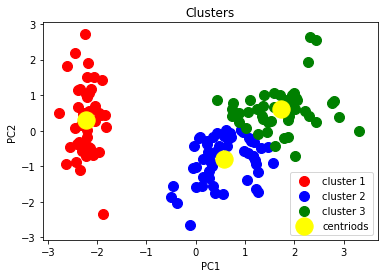

In [45]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1] , s=100 , c='red' ,label = 'cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1] , s=100 , c='blue' ,label = 'cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1] , s=100 , c='green' ,label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=300 , c='yellow' ,label = 'centriods')
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()